In [8]:
from indra_cogex.sources.odinson.grammars import Rule
from indra_cogex.sources.odinson.client import process_rules
import gilda
import pandas as pd
from collections import defaultdict
from gilda.process import normalize
from tqdm.auto import tqdm
from pyobo.gilda_utils import get_gilda_terms

In [9]:
#reformat terms
df = pd.read_csv('spine.tsv', sep = '\t', header = None, names = ['name', 'id'])
#for each id, make a list of the corresponding brain regions
id_to_names = defaultdict(list)
for name,identifier in df.values:
    id_to_names[identifier].append(name)
terms = []
#label terms with the same id as synonyms
for identifier, names in id_to_names.items():
    #label everything except the first as synonyms
    name,*synonyms = names
    term = gilda.term.Term(
                norm_text=normalize(name),
                text=name,
                db="spine",
                id=identifier,
                entry_name=name,
                status="name",
                source="spine",
            )
    terms.append(term)
    for synonym in synonyms:
        term = gilda.term.Term(
                norm_text=normalize(synonym),
                text=synonym,
                db="spine",
                id=identifier,
                entry_name=name,
                status="synonym",
                source="spine",
            )
        terms.append(term)
terms.extend(get_gilda_terms('UBERON'))
terms.extend(get_gilda_terms('fma'))
#terms.extend(get_gilda_terms('ncit'))
grounder = gilda.Grounder(terms)
grounder

[UBERON] mapping: 100%|██████████████████| 14.5k/14.5k [00:00<00:00, 230kname/s]
[UBERON] mapping: 100%|██████████████| 9.84k/9.84k [00:00<00:00, 71.5ksynonym/s]
[fma] mapping: 100%|█████████████████████| 79.0k/79.0k [00:00<00:00, 242kname/s]
[fma] mapping: 100%|██████████████████| 29.8k/29.8k [00:00<00:00, 159ksynonym/s]


In [31]:
#list of rules with two named entities
'''binary_rules = ["(?<connector> [entity=B-TissueType][entity=I-TissueType]*) <nsubj [lemma=connect]>dobj ([entity=B-TissueType][entity=I-TissueType]*) and (?<region> [entity=B-TissueType][entity=I-TissueType]*)",
               "([entity=B-TissueType][entity=I-TissueType]*) <nsubj [lemma=connect]>dobj (?<region> [entity=B-TissueType][entity=I-TissueType]*) and (?<region> [entity=B-TissueType][entity=I-TissueType]*)",
               "(?<connector> [entity=B-TissueType][entity=I-TissueType]*)<nsubj [lemma=connect]>dobj (?<region> [entity=B-TissueType][entity=I-TissueType]*)",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [entity=B-TissueType][entity=I-TissueType]*) (?<region> [entity=B-TissueType][entity=I-TissueType]*)",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [entity=B-TissueType][entity=I-TissueType]*) and (?<region> [entity=B-TissueType][entity=I-TissueType]*)",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [entity=B-TissueType][entity=I-TissueType]*) with (?<region> [entity=B-TissueType][entity=I-TissueType]*)",
               "(?<connector> [entity=B-Organ][entity=I-Organ]*)<nsubj [lemma=connect]>dobj (?<region> [entity=B-Organ])",
               "(?<connector> [entity=B-Organ][entity=I-Organ]*) <nsubj [lemma=connect]>dobj ([entity=B-Organ][entity=I-Organ]*) and (?<region> [entity=B-Organ][entity=I-Organ]*)",
               "([entity=B-Organ][entity=I-Organ]*) <nsubj [lemma=connect]>dobj (?<region> [entity=B-Organ][entity=I-Organ]*) and (?<region> [entity=B-Organ][entity=I-Organ]*)",
               "(?<connector> [entity=B-Organ][entity=I-Organ]*)<nsubj [lemma=connect]>dobj (?<region> [entity=B-Organ][entity=I-Organ]*)",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [entity=B-Organ][entity=I-Organ]*) (?<region> [entity=B-Organ][entity=I-Organ]*)",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [entity=B-Organ][entity=I-Organ]*) and (?<region> [entity=B-Organ][entity=I-Organ]*)",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [entity=B-Organ][entity=I-Organ]*) with (?<region> [entity=B-Organ][entity=I-Organ]*)",
               "(?<connector> [entity=B-Organ][entity=I-Organ]*)<nsubj [lemma=connect]>dobj (?<region> [entity=B-Organ])",
               "(?<connector> [tag=/N.*/])<nsubj [lemma=connect]>dobj (?<region1> [tag=/N.*/])"]
'''

binary_rules = ["(?<connector> [tag=/N.*/]) <nsubj [lemma=connect]>dobj ([tag=/N.*/]) and (?<region> [tag=/N.*/])",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [tag=/N.*/]) and (?<region> [tag=/N.*/])",
               "(?<connector> [tag=/N.*/])<nsubj [lemma=connect]>dobj (?<region> [tag=/N.*/])",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [tag=/N.*/]) (?<region> [tag=/N.*/])",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [tag=/N.*/]) and (?<region> [tag=/N.*/])",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [tag=/N.*/]) with (?<region> [tag=/N.*/])",
               "(?<connector> [tag=/N.*/])<nsubj [lemma=connect]>dobj (?<region> [tag=/N.*/])",
               "(?<connector> [tag=/N.*/]) <nsubj [lemma=connect]>dobj (([tag=/N.*/]) and (?<region> [tag=/N.*/])",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [tag=/N.*/]) and (?<region> [tag=/N.*/])",
               "(?<connector> [tag=/N.*/])<nsubj [lemma=connect]>dobj (?<region> [tag=/N.*/])",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [tag=/N.*/]) (?<region> [tag=/N.*/])",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [tag=/N.*/]) and (?<region> [tag=/N.*/])",
               "([tag=/N.*/]) <nsubj [lemma=connect]>dobj (?<region> [tag=/N.*/]) with (?<region> [tag=/N.*/])",
               "(?<connector> [tag=/N.*/])<nsubj [lemma=connect]>dobj (?<region> [tag=/N.*/])",
               "(?<connector> [tag=/N.*/])<nsubj [lemma=connect]>dobj (?<region1> [tag=/N.*/])",
               "[tag=/N.*/]"]

#regionconnect=Rule("anatomical connection", "Exp", "basic", "(?<connector> [entity=B-TissueType][entity=I-TissueType]*)[lemma=connect]")

In [32]:
#get the start and end numbers
relations = []
for rule_text in tqdm(binary_rules):
    rule = Rule("anatomical connection", "Exp", "basic", rule_text)
    try:
        rule_output = process_rules([rule],"http://localhost:9000")
    except Exception as e:
        print('failed', rule)
        print(e)
        continue
    for sentence in rule_output['mentions']:
        relation = ()
        words = sentence['words']
        for element in sentence['match']:  
            for entity in element['namedCaptures']:
                start = entity['capturedMatch']['start']
                end = entity['capturedMatch']['end']
                word = ' '.join(words[start:end])
                spine_scored_match = grounder.ground(word)
                gilda_scored_match = gilda.ground(word)
                if len(gilda_scored_match)>0:
                    best_curie = gilda_scored_match[0].term.get_curie()
                elif len(spine_scored_match)>0:
                    best_curie = spine_scored_match[0].term.get_curie()
                else:
                    best_curie = None
                relation += ((best_curie, word),)  
        relations.append(relation)
        print(words, relations)

            
            

 25%|███████████                                 | 4/16 [00:00<00:00, 18.31it/s]

['It', 'has', 'been', 'hypothesized', 'that', 'language', 'processing', 'involves', 'two', 'streams', ';', 'the', 'dorsal', 'stream', 'connects', 'Broca', '’', 's', 'and', 'Wernicke', '’', 's', 'regions', 'via', 'the', 'arcuate', 'fasciculus', 'and', 'is', 'involved', 'in', 'mapping', 'sound', 'to', 'articulation', ',', 'whereas', 'the', 'ventral', 'language', 'stream', 'connects', 'the', 'anterior', 'and', 'lateral', 'temporal', 'lobe', 'via', 'the', 'uncinate', 'fasciculus', 'and', 'is', 'involved', 'in', 'mapping', 'sound', 'to', 'meaning', '(', '51', ')', '.'] [((None, 'stream'), (None, 'Wernicke'))]
['It', 'has', 'been', 'hypothesized', 'that', 'language', 'processing', 'involves', 'two', 'streams', ';', 'the', 'dorsal', 'stream', 'connects', 'Broca', '’', 's', 'and', 'Wernicke', '’', 's', 'regions', 'via', 'the', 'arcuate', 'fasciculus', 'and', 'is', 'involved', 'in', 'mapping', 'sound', 'to', 'articulation', ',', 'whereas', 'the', 'ventral', 'language', 'stream', 'connects', 'th

 75%|████████████████████████████████▎          | 12/16 [00:00<00:00, 30.10it/s]

['UF', 'connects', 'ventral', 'frontal', 'areas', 'to', 'anterior', 'temporal', 'areas', '.'] [((None, 'stream'), (None, 'Wernicke')), (('CHEBI:36368', 's'), (None, 'Wernicke')), ((None, 'UF'), ('efo:0001696', 'areas')), (('fma:76739', 'tracts'), (None, 'regions')), (('mesh:D001921', 'brain'), (None, 'regions')), ((None, 'IFOF'), ('efo:0001696', 'areas')), (('fma:76739', 'tracts'), ('uberon:0001851', 'cortex')), (('fma:76739', 'tracts'), (None, 'regions')), (('CHEBI:34922', 'pathways'), ('hgnc:3192', 'STN')), (('CHEBI:34922', 'pathways'), (None, 'pallidus')), (('fma:76739', 'tracts'), (None, 'cortices')), ((None, 'stream'), ('CHEBI:36368', 's')), ((None, 'stream'), ('CHEBI:36368', 's')), ((None, 'stream'), ('hgnc:28426', 'lobe')), (('fma:76740', 'fascicle'), ('fma:50594', 'surfaces')), (('uberon:0025534', 'sensorimotor'), (None, 'cortices')), ((None, 'globus'), (None, 'pallidus')), (('CHEBI:36368', 's'), (None, 'regions')), (('efo:0001656', 'dorsal'), ('hgnc:18233', 'bank')), (('CHEBI:

100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 27.41it/s]

['Interhemispheric', 'tracts', 'The', 'anterior', 'commissure', 'connects', 'ventral', 'and', 'anterior', 'temporal', 'cortices', 'of', 'both', 'hemispheres', ',', 'including', 'the', 'amygdalae', '.'] [((None, 'stream'), (None, 'Wernicke')), (('CHEBI:36368', 's'), (None, 'Wernicke')), ((None, 'UF'), ('efo:0001696', 'areas')), (('fma:76739', 'tracts'), (None, 'regions')), (('mesh:D001921', 'brain'), (None, 'regions')), ((None, 'IFOF'), ('efo:0001696', 'areas')), (('fma:76739', 'tracts'), ('uberon:0001851', 'cortex')), (('fma:76739', 'tracts'), (None, 'regions')), (('CHEBI:34922', 'pathways'), ('hgnc:3192', 'STN')), (('CHEBI:34922', 'pathways'), (None, 'pallidus')), (('fma:76739', 'tracts'), (None, 'cortices')), ((None, 'stream'), ('CHEBI:36368', 's')), ((None, 'stream'), ('CHEBI:36368', 's')), ((None, 'stream'), ('hgnc:28426', 'lobe')), (('fma:76740', 'fascicle'), ('fma:50594', 'surfaces')), (('uberon:0025534', 'sensorimotor'), (None, 'cortices')), ((None, 'globus'), (None, 'pallidus')

In [34]:
relations


[((None, 'stream'), (None, 'Wernicke')),
 (('CHEBI:36368', 's'), (None, 'Wernicke')),
 ((None, 'UF'), ('efo:0001696', 'areas')),
 (('fma:76739', 'tracts'), (None, 'regions')),
 (('mesh:D001921', 'brain'), (None, 'regions')),
 ((None, 'IFOF'), ('efo:0001696', 'areas')),
 (('fma:76739', 'tracts'), ('uberon:0001851', 'cortex')),
 (('fma:76739', 'tracts'), (None, 'regions')),
 (('CHEBI:34922', 'pathways'), ('hgnc:3192', 'STN')),
 (('CHEBI:34922', 'pathways'), (None, 'pallidus')),
 (('fma:76739', 'tracts'), (None, 'cortices')),
 ((None, 'stream'), ('CHEBI:36368', 's')),
 ((None, 'stream'), ('CHEBI:36368', 's')),
 ((None, 'stream'), ('hgnc:28426', 'lobe')),
 (('fma:76740', 'fascicle'), ('fma:50594', 'surfaces')),
 (('uberon:0025534', 'sensorimotor'), (None, 'cortices')),
 ((None, 'globus'), (None, 'pallidus')),
 (('CHEBI:36368', 's'), (None, 'regions')),
 (('efo:0001656', 'dorsal'), ('hgnc:18233', 'bank')),
 (('CHEBI:36368', 's'), (None, 'Wernicke')),
 (('uberon:0001851', 'cortex'), ('efo:00

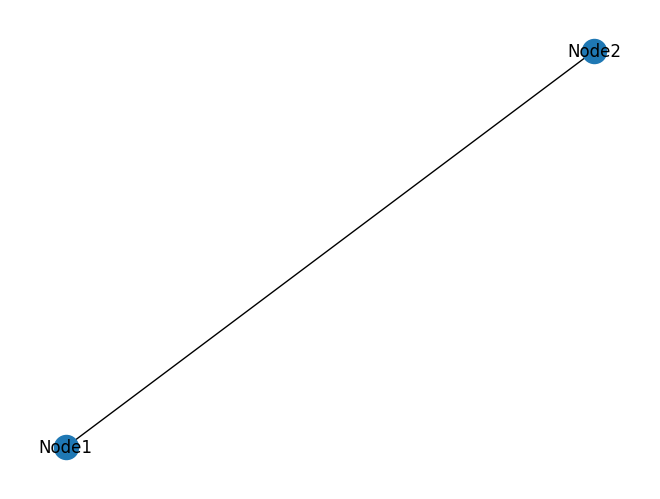

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
# Add nodes and edges
G.add_edge("Node1", "Node2")
nx.draw(G, with_labels = True)
plt.savefig('labels.png')

In [36]:
#figure out how to add names to nodes, use graphvis to output graph, get it to a point of more relationships, rules w uberon/fma
#!pip install matplotlib
import networkx as nx
import pygraphviz as pgv
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edges_from(relations)

#pos = nx.nx_agraph.graphviz_layout(G)
labels = {n: n[1] for n in G.nodes()}
#G = nx.relabel(G, labels)
#nx.draw_networkx_labels(G, pos, labels, font_size=22, font_color="black")
nx.draw(G, with_labels = False)


NetworkXError: Edge tuple () must be a 2-tuple or 3-tuple.

In [ ]:
scoredmatches = gilda.ground('ER')
scoredmatches[0].term.get_curie()

In [ ]:
benchmark_url = ('https://docs.google.com/spreadsheets/d/e/2PACX-1vS6uvih2Hi7dIo9Nabk5gv2kz67avmHpiWvqtNOKxrr43WhxSCBwzyq'
'lLvi841Vx3f1LoF7GF_5Cff3/pub?output=tsv')
benchmark_df = pd.read_csv(benchmark_url, sep='\t')
subject = gilda.ground_df(benchmark_df, 'subject', grounder=grounder)
object = gilda.ground_df(benchmark_df, 'object', grounder=grounder)

benchmark_df
